In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("/content/Churn_Modelling.csv")

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
df.drop(['RowNumber','CustomerId','Surname'],axis = 1,inplace = True)

In [9]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [10]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [11]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [12]:
X = df.drop('Exited',axis = 1)
y = df['Exited']

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)

In [17]:
X_train_sc

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [18]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [30]:
from keras.api._v2.keras import activations
model = Sequential()
model.add(Dense(11,activation = "relu",input_dim = 11))
model.add(Dense(11,activation = "relu"))
model.add(Dense(1,activation = "sigmoid"))

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 11)                132       
                                                                 
 dense_3 (Dense)             (None, 11)                132       
                                                                 
 dense_4 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics = ['accuracy'])

In [42]:
history = model.fit(X_train_sc,y_train,epochs = 100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3173 - accuracy: 0.8702 - val_loss: 0.3407 - val_accuracy: 0.8531
Epoch 2/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3168 - accuracy: 0.8705 - val_loss: 0.3418 - val_accuracy: 0.8525
Epoch 3/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3173 - accuracy: 0.8691 - val_loss: 0.3411 - val_accuracy: 0.8519
Epoch 4/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3168 - accuracy: 0.8711 - val_loss: 0.3416 - val_accuracy: 0.8506
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3169 - accuracy: 0.8691 - val_loss: 0.3419 - val_accuracy: 0.8537
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3161 - accuracy: 0.8705 - val_loss: 0.3417 - val_accuracy: 0.8519
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3166 - accuracy: 0.8705 - val_loss: 0.3419 - val_accuracy: 0.8512

In [35]:
model.layers[0].get_weights()

[array([[-3.09603784e-04,  2.74297029e-01, -4.95836794e-01,
         -3.00020017e-02, -2.44651362e-01,  7.98560902e-02,
          3.76507789e-01, -3.11868102e-03,  2.44808495e-02,
          1.50504321e-01, -1.93367824e-01],
        [-9.02006745e-01,  1.09431818e-01, -3.82079661e-01,
          9.92264330e-01,  5.27344584e-01, -3.69404614e-01,
         -4.72015440e-01,  5.54495811e-01, -2.84194797e-02,
         -4.81505632e-01, -5.74183371e-03],
        [-2.42518932e-01, -2.02587824e-02, -2.59754509e-01,
          3.88080776e-02, -1.54633000e-02,  9.27048773e-02,
         -1.68505106e-02, -3.82230766e-02, -2.00833380e-02,
          6.21288642e-02, -1.57329977e-01],
        [ 3.33573133e-01, -6.36146545e-01, -1.41140208e-01,
         -6.83672260e-03, -6.17782399e-03, -4.12393212e-02,
          3.27721030e-01,  8.33113268e-02, -8.55078101e-01,
          3.76288891e-01,  3.83955181e-01],
        [ 2.26522550e-01, -2.48876393e-01,  9.57762420e-01,
          1.12288940e+00, -2.12343901e-01, -

In [36]:
model.layers[1].get_weights()

[array([[-2.81819224e-01,  3.20832193e-01, -4.82634455e-01,
          4.97577637e-01, -8.14187825e-01,  7.99840391e-01,
         -7.55114675e-01,  1.28501669e-01, -7.40618825e-01,
         -4.50532476e-04,  4.03667837e-01],
        [-4.88642871e-01, -1.57644343e+00,  9.52407718e-02,
          2.50469953e-01,  3.36638168e-02, -6.32255256e-01,
          4.34787005e-01,  1.34147689e-01,  1.58397093e-01,
          3.13112378e-01, -3.16339433e-01],
        [ 2.04560041e-01, -4.11296636e-01,  2.37540871e-01,
         -2.43202493e-01,  5.53341687e-01, -6.88258648e-01,
          2.22613096e-01, -6.82499306e-03,  6.05967641e-01,
         -4.57781821e-01,  7.98427463e-01],
        [ 2.90028423e-01,  6.09303176e-01, -9.06053603e-01,
          2.51854509e-02, -2.32254222e-01,  3.75737935e-01,
         -1.04452097e+00, -1.00922310e+00, -6.46778762e-01,
          2.09487323e-02, -6.30679607e-01],
        [-1.75547779e-01, -3.19325924e-01,  3.10611606e-01,
          9.35660422e-01, -1.52446151e-01,  

In [37]:
model.layers[2].get_weights()

[array([[ 1.4352064 ],
        [ 0.6858791 ],
        [ 1.1488336 ],
        [-0.48038712],
        [-1.7626554 ],
        [-0.38606712],
        [ 1.113941  ],
        [ 0.6773798 ],
        [-0.72902954],
        [-0.4776457 ],
        [-0.42587638]], dtype=float32), array([-0.08094821], dtype=float32)]

In [38]:
y_log = model.predict(X_test_sc)

63/63 [==============================] - 0s 2ms/step


In [39]:
y_pred = np.where(y_log>0.5,1,0)

In [40]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.862

In [44]:
history.history

{'loss': [0.3172803521156311,
  0.3167785406112671,
  0.31726884841918945,
  0.31676924228668213,
  0.3168888986110687,
  0.3160831928253174,
  0.3165959417819977,
  0.31648045778274536,
  0.31618237495422363,
  0.31608447432518005,
  0.3159100413322449,
  0.31617480516433716,
  0.3159870505332947,
  0.3160592019557953,
  0.31550541520118713,
  0.3157710134983063,
  0.3156507611274719,
  0.3157459795475006,
  0.3154556155204773,
  0.3150620460510254,
  0.3156450390815735,
  0.31520313024520874,
  0.31510019302368164,
  0.3154592216014862,
  0.31485122442245483,
  0.31424418091773987,
  0.3148152828216553,
  0.314665287733078,
  0.31471535563468933,
  0.31497302651405334,
  0.314314067363739,
  0.31450510025024414,
  0.31380265951156616,
  0.3141978681087494,
  0.3142566382884979,
  0.31414973735809326,
  0.313944011926651,
  0.3137936294078827,
  0.3128553330898285,
  0.3145957291126251,
  0.3134315609931946,
  0.3134235441684723,
  0.3133864104747772,
  0.31257084012031555,
  0.313045

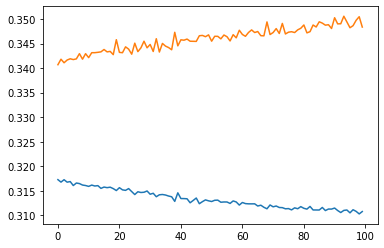

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

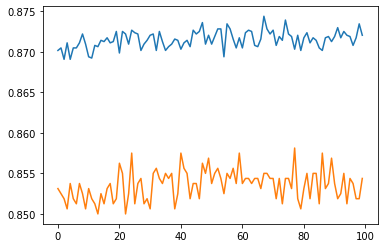

In [48]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
## In this case overfitting condition occurs